In [1]:
# required for jupyter notebook
%matplotlib inline 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
sns.set(rc={'figure.figsize':(8,6)}) # set sns figure size

import os
import math

In [2]:
def show_corr_heatmap(df):
    # https://medium.com/@szabo.bibor/how-to-create-a-seaborn-correlation-heatmap-in-python-834c0686b88e

    plt.figure(figsize=(20, 10))

    corr_matrix = df.corr()

    # mask to hide the upper triangle of the symmetric corr-matrix
    # mask = np.triu(np.ones_like(corr_matrix, dtype=np.bool))

    heatmap = sns.heatmap(

        # correlation matrix
        corr_matrix,

        # mask the top triangle of the matrix
        # mask=mask,

        # two-contrast color, different color for + -
        cmap="PiYG",

        # color map range
        vmin=-1, vmax=1,

        # show corr values in the cells
        annot=True
    )

    # set a title
    heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':20}, pad=16);

    plt.show()

In [3]:
# read raw csv by marking dropping missing values
missing_values = ['NIL', 'nil', '']
raw_df = pd.read_csv(os.path.join('..', '..', 'Datasets', 'water-level', 'barisal-weather-waterlevel_merged.csv'), 
                     na_values=missing_values)

raw_df.head()

,Station,Year,Month,Day,Max Temp. (degree Celcius),Min Temp. (degree Celcius),Rainfall (mm),Actual Evaporation (mm),"Relative Humidity (morning, %)","Relative Humidity (afternoon, %)",Sunshine (hour/day),Cloudy (hour/day),Solar Radiation (cal/cm^2/day),MAX_WL(m),MIN_WL(m),AVE_WL(m)
0,Barisal,2017,1,1,25.2,13.8,0.0,1.0,94,62.0,6.3,4.5,277.72,1.17,0.13,0.65
1,Barisal,2017,1,2,25.4,13.8,0.0,1.0,94,62.0,5.5,5.3,257.52,1.10,0.11,0.65
2,Barisal,2017,1,3,25.6,13.4,0.0,1.0,94,61.0,6.2,4.6,275.20,1.05,0.08,0.65
3,Barisal,2017,1,4,25.4,14.0,0.0,1.0,94,64.0,6.3,4.5,277.72,0.99,0.04,0.60
4,Barisal,2017,1,5,23.0,13.0,0.0,1.0,94,68.0,4.0,6.8,219.63,0.95,0.02,0.55


In [4]:
raw_df['Month'].value_counts()

1     124
3     124
5     124
7     124
10    124
12    124
4     120
6     120
8     120
9     120
11    116
2     113
Name: Month, dtype: int64

In [5]:
min_waterLevel_column = 'MIN_WL(m)'
max_waterLevel_column = 'MAX_WL(m)'
avg_waterLevel_column = 'AVE_WL(m)'

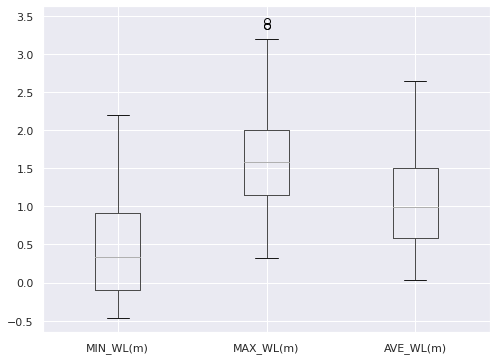

In [6]:
_ = raw_df.boxplot(column=[min_waterLevel_column, max_waterLevel_column, avg_waterLevel_column])

## Max Water Level Analysis

<AxesSubplot:>

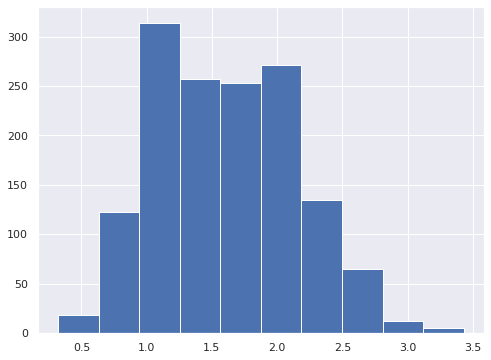

In [7]:
raw_df[max_waterLevel_column].hist(bins=10)

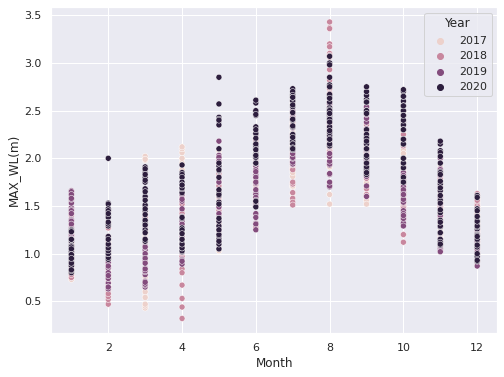

In [8]:
_=sns.scatterplot(data=raw_df, x='Month', y=max_waterLevel_column, hue='Year')

## Average Water Level Analysis

<AxesSubplot:>

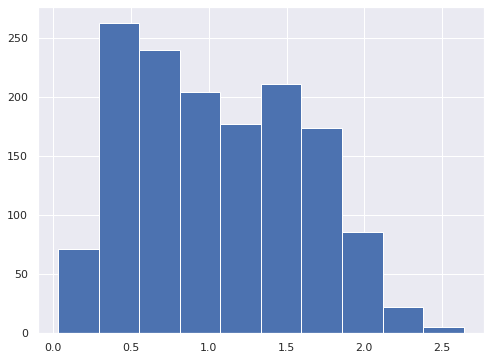

In [9]:
raw_df[avg_waterLevel_column].hist(bins=10)

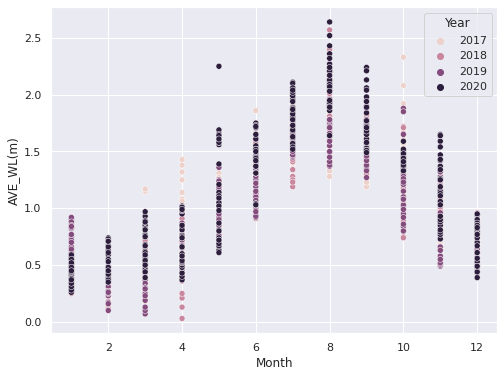

In [10]:
_=sns.scatterplot(data=raw_df, x='Month', y=avg_waterLevel_column, hue='Year')

## Correlation Heatmap

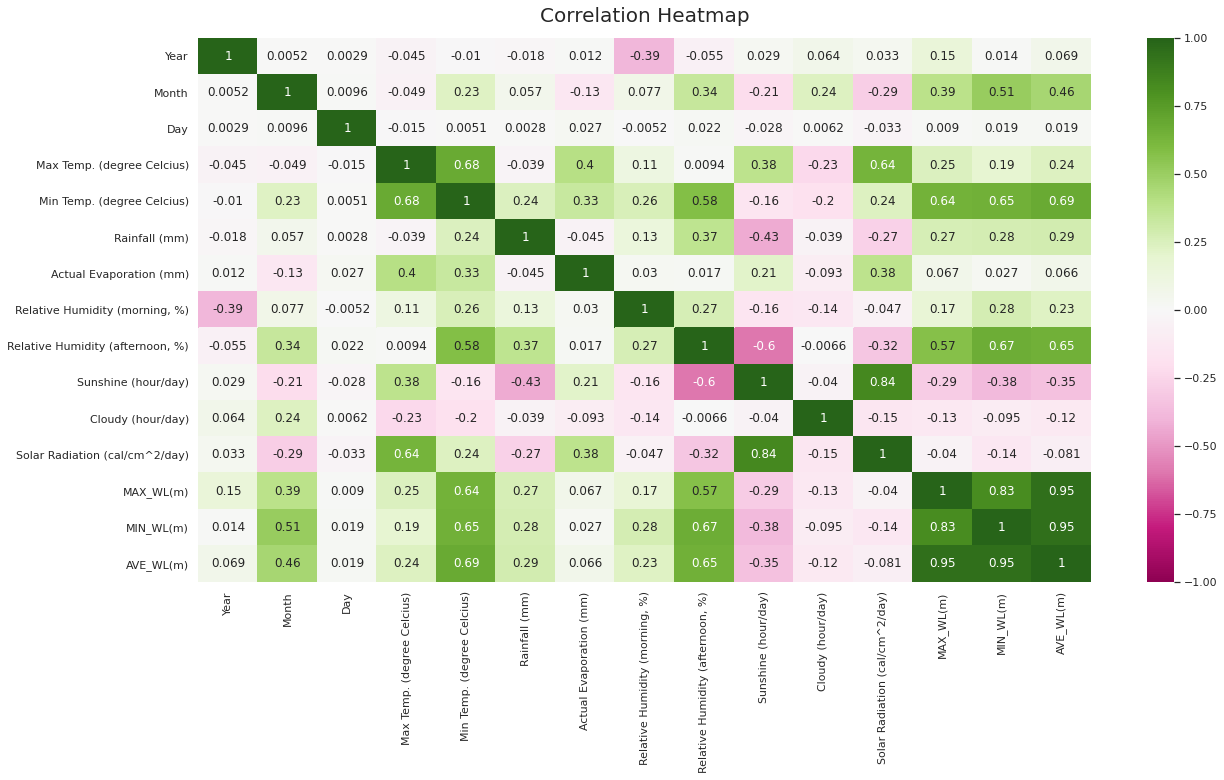

In [11]:
show_corr_heatmap(raw_df)